# F16 Air Collision Property Falsification


We will be analyzing an air collision avoidance autopilot, attempting to find instances where the autopilot fails to avoid a collision. For this activity, we have described the F16 system, intruder scenario, properties, and solver configuration using CSAF abstractions. Namely,

* **Systems** The ownship and intruder F-16 systems are described as systems composed of components. The ACAS autopilot collects messages of both aircrafts' states and determines a corrective course for the ownship.

* **Scenarios** The systems are dozens of states and parameters, and so exploring this space fully would be intensive. Scenarios allow one to define an interface that reduces the parameters to search by fixing some value or appealing to symmetry present in the system. For instance, rather than varying both aircrafts' position, airspeed, and heading, relative values are searched. We fix the ownship speed, heading, and position, while varying the intruder.

* **Goals** Goals encode properties associated with systems or scenarios and an analysis that can verify or falsify them. In this case, we attempt to falsify a collision property using bayesian optimization. Note that failing to falsify the collision doesn't mean that the ownship is verfied to avoid a collision in the scenario's configuration space.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys
sys.path.append("..")

import csaf
from csaf_f16.goals import AcasSimpleFalsifyGoal, AcasNoBalloonAirspeedFalsifyGoal

## Construct the F16 Scenario

`csaf_f16` has a collection goals in `csaf_f16.goals`. One goal is `AcasSimpleFalsifyGoal` and contains an intruder and ownship F-16 whose relative lateral position, heading, and airspeed can be searched.

In [2]:
# Create falsification goal
g = AcasSimpleFalsifyGoal()

## Solve the Optimization Problem

The goal object already has its falsification strategy set--constrained bayesian optimization (using `GPyOpt`). As the falsifier will run indefinitely if there are no counterexamples, we set a maximum time and maximum number of solver iterations.

In [3]:
# Run optimization with default values
g.test(max_time=300.0, max_iter=1000)

False

## Visualize the Optimal Configuration

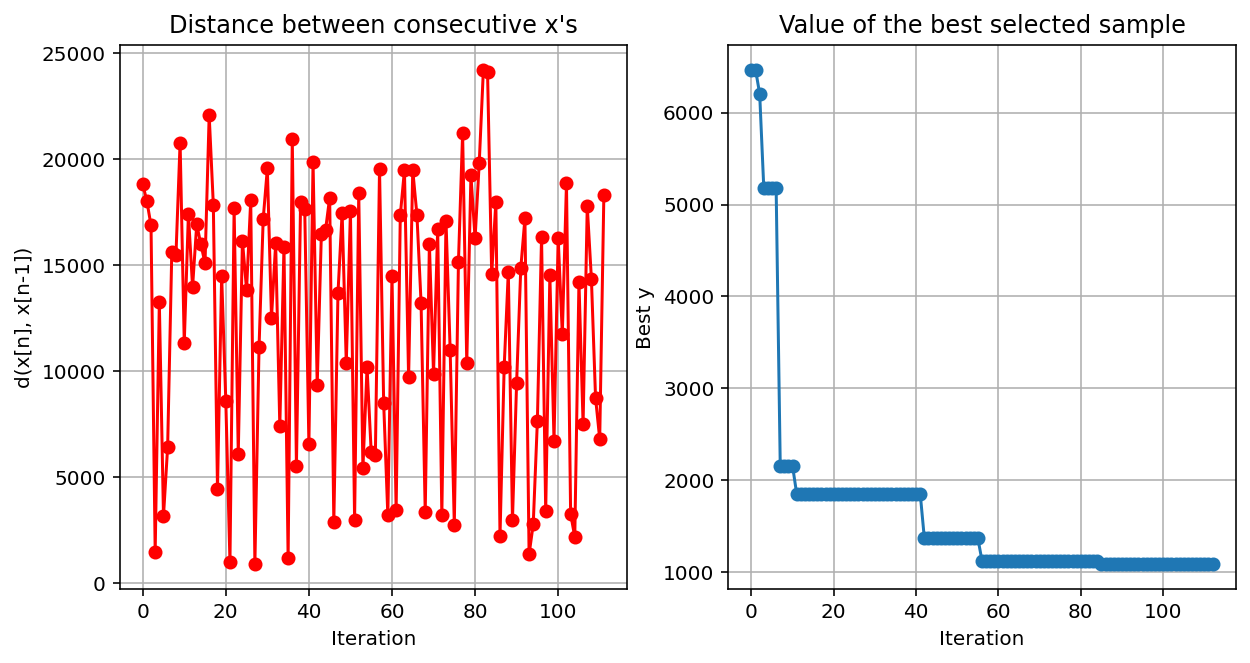

In [4]:
# plot GPyOpt's Convergence Information
g.optimizer.plot_convergence()

In [5]:
# print optimal configuration and objective value
print(g.optimizer.x_opt)
print(g.optimizer.fx_opt)

[ 5.14132983e+03  5.54814867e+03 -1.92875491e+00 -1.56996770e+02]
1089.5747732753089


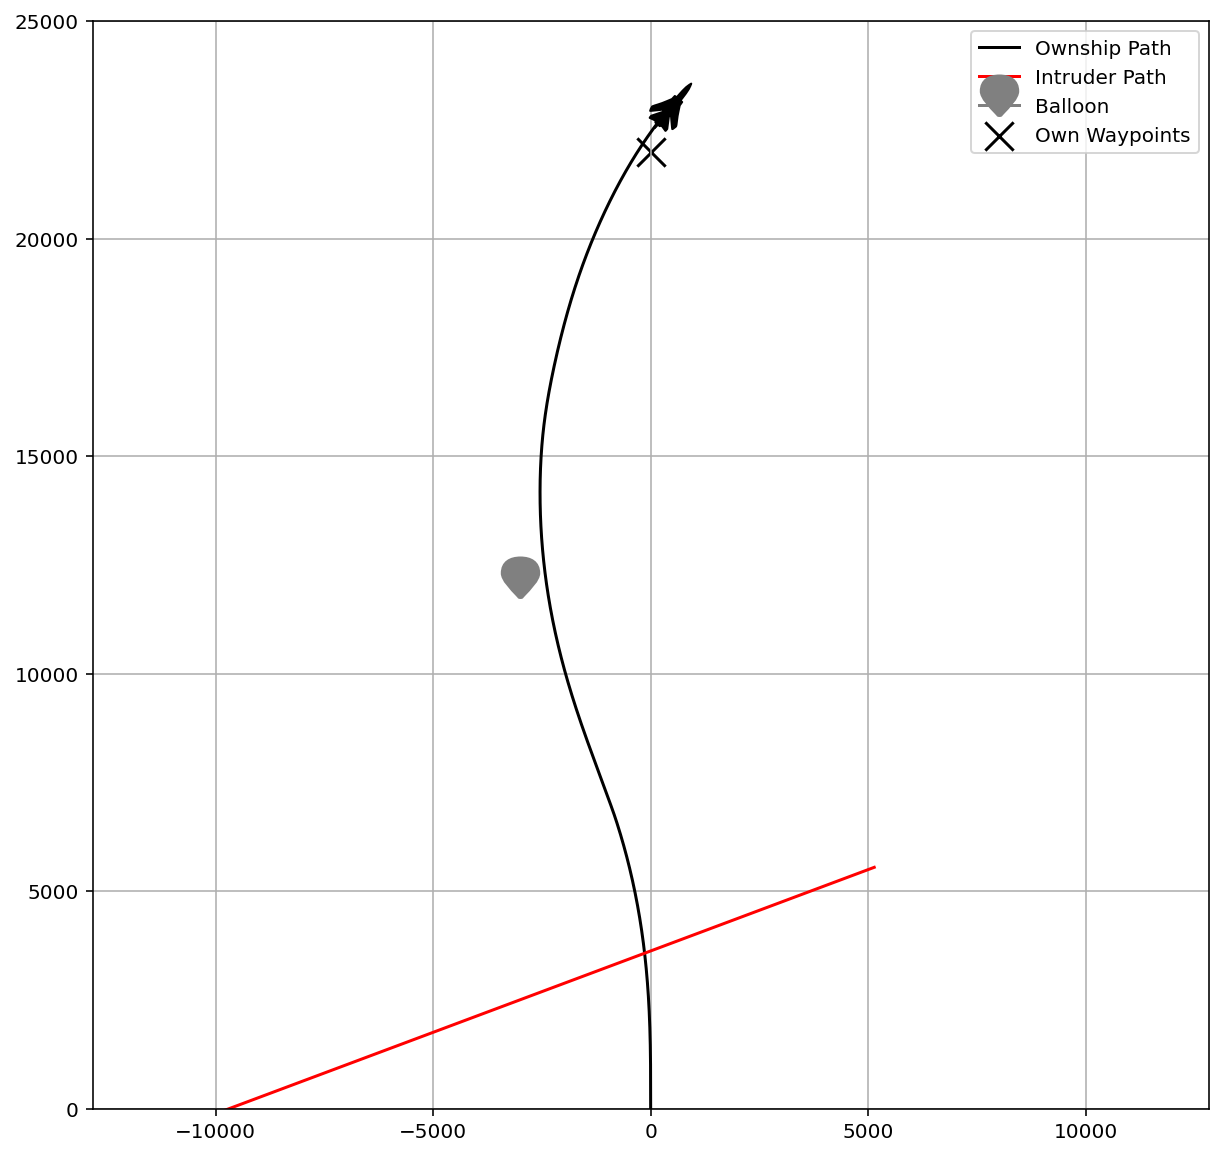

<Figure size 720x720 with 0 Axes>

In [6]:
# run the best example and plot the results (using AcasScenarioViewer)
from csaf_f16.acas import AcasScenarioViewer

x0 = g.optimizer.x_opt
scen = g.scenario_type()
trajs, p = g.run_sim(x0)

viewer = AcasScenarioViewer(trajs, scen)
fig, ax = viewer.summary_plot()
ax.set_xlim(-10000, 10000)
ax.set_ylim(0, 25000)
plt.show()

In [7]:
# uncomment this to see a video
"""
from IPython.display import HTML
from matplotlib import animation
anim = viewer.summary_video(bounds=((-15000, 15000), (-5000, 25000)), msize=0.0005)
HTML(anim.to_jshtml())
"""

'\nfrom IPython.display import HTML\nfrom matplotlib import animation\nanim = viewer.summary_video(bounds=((-15000, 15000), (-5000, 25000)), msize=0.0005)\nHTML(anim.to_jshtml())\n'